In [1]:
# Get necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get data

parkinsons_df = pd.read_csv('./data/parkinsons_data.csv')
parkinsons_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:xlabel='RPDE', ylabel='D2'>

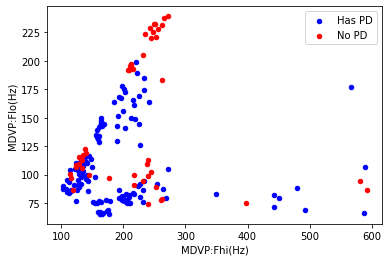

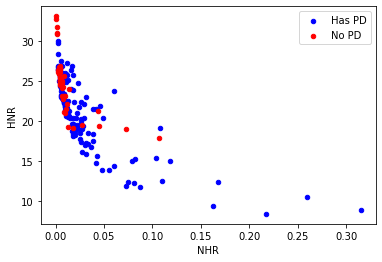

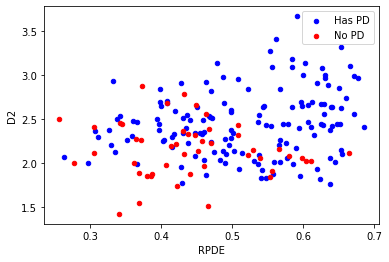

In [3]:
# Plot the dataset

has_pd = parkinsons_df[parkinsons_df['status']==1]
no_pd = parkinsons_df[parkinsons_df['status']==0]

axes = has_pd.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', color='blue', label="Has PD")
no_pd.plot(kind='scatter', x='MDVP:Fhi(Hz)', y='MDVP:Flo(Hz)', color='red', label="No PD", ax=axes)

axes1 = has_pd.plot(kind='scatter', x='NHR', y='HNR', color='blue', label="Has PD")
no_pd.plot(kind='scatter', x='NHR', y='HNR', color='red', label="No PD", ax=axes1)

axes2 = has_pd.plot(kind='scatter', x='RPDE', y='D2', color='blue', label="Has PD")
no_pd.plot(kind='scatter', x='RPDE', y='D2', color='red', label="No PD", ax=axes2)

In [4]:
# Identify unwanted columns
parkinsons_df.dtypes

# Remove unwanted columns
parkinsons_df.columns

feature_df = parkinsons_df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]

# Independent variable
X = np.asarray(feature_df)

# Dependent variable
y = np.asarray(parkinsons_df['status'])

In [5]:
# Select data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train: (156, 22)
y_train: (156,)
X_test:  (39, 22)
y_test:  (39,)


In [6]:
# SVM
from sklearn import svm

# Penalty for classification varies per model

# Generate SVM Models
# using dot product kernel
pd_lin = svm.SVC(kernel='linear', gamma='scale', C=1).fit(X_train,y_train)

#using gaussian kernel
pd_rbf = svm.SVC(kernel='rbf', gamma='scale', C=100).fit(X_train,y_train)

# using polynomial kernel of degree 3
pd_ploy = svm.SVC(kernel='poly', degree=3, C=100).fit(X_train,y_train)

# using sigmoid kernel
pd_sig = svm.SVC(kernel='sigmoid', gamma='scale', C=10).fit(X_train,y_train)


# Generate Predictions and Testing
# dot product
pd_lin_predict = pd_lin.predict(X_test)
# gaussian kernel
pd_rbf_predict = pd_rbf.predict(X_test)
# polynomial kernel
pd_ploy_predict = pd_ploy.predict(X_test)
# sigmoid kernel
pd_sig_predict = pd_sig.predict(X_test)

In [10]:
# Print performance
from sklearn.metrics import classification_report

print("\033[1mDot product kernel\033[0m")
print(classification_report(y_test,pd_lin_predict))
print("\033[1mGaussian kernel\033[0m")
print(classification_report(y_test,pd_rbf_predict))
print("\033[1mPolynomial kernel of degree 3\033[0m")
print(classification_report(y_test,pd_ploy_predict))
print("\033[1mSigmoid kernel\033[0m")
print(classification_report(y_test,pd_sig_predict))

Dot product kernel
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

Gaussian kernel
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39

Polynomial kernel of degree 3
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted 

In [8]:
# Model performance using the reserved test data

print("Linear kernel:     ",pd_lin.score(X_test, y_test))
print("Gaussian kernel:   ",pd_rbf.score(X_test, y_test))
print("Polynomial kernel: ",pd_ploy.score(X_test, y_test))
print("Sigmoid kernel:    ",pd_sig.score(X_test, y_test))

Linear kernel:      0.9230769230769231
Gaussian kernel:    0.8717948717948718
Polynomial kernel:  0.8974358974358975
Sigmoid kernel:     0.8717948717948718


In [9]:
# Validate the robustness of the model using K-Fold Cross validation technique

from sklearn import model_selection

print("\033[1mLinear Kernel\033[0m")
lin_scores_res = model_selection.cross_val_score(pd_lin, X, y, cv=5)
# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(lin_scores_res)
# And the mean accuracy of all 5 folds.
print(lin_scores_res.mean())

print("\n\033[1mGaussian Kernel\033[0m")
rbf_scores_res = model_selection.cross_val_score(pd_rbf, X, y, cv=5)
# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(rbf_scores_res)
# And the mean accuracy of all 5 folds.
print(rbf_scores_res.mean())

print("\n\033[1mPolynomial Kernel\033[0m")
ploy_scores_res = model_selection.cross_val_score(pd_ploy, X, y, cv=5)
# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(ploy_scores_res)
# And the mean accuracy of all 5 folds.
print(ploy_scores_res.mean())

print("\n\033[1mSigmoid Kernel\033[0m")
sig_scores_res = model_selection.cross_val_score(pd_sig, X, y, cv=5)
# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(sig_scores_res)
# And the mean accuracy of all 5 folds.
print(sig_scores_res.mean())

Linear Kernel
[0.92307692 0.82051282 0.87179487 0.76923077 0.74358974]
0.8256410256410256

Gaussian Kernel
[0.84615385 0.82051282 0.82051282 0.69230769 0.69230769]
0.7743589743589745

Polynomial Kernel
[0.97435897 0.79487179 0.82051282 0.64102564 0.74358974]
0.7948717948717948

Sigmoid Kernel
[0.74358974 0.76923077 0.74358974 0.74358974 0.64102564]
0.7282051282051282
